# AI Echo: Your Smartest Conversational Partner

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#tokenizer
nltk.download('punkt')
#stopwords
nltk.download('stopwords')
#lexical database
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# tab-aware sentence tokenizer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\harip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Ignore warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install spacy -q

In [5]:
!python -m spacy download en_core_web_sm -q

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
!pip install wordcloud -q

In [7]:
!pip install langdetect -q

### Importing Dataset

In [8]:
df = pd.read_csv("chatgpt_style_reviews_dataset.xlsx - Sheet1.csv")
display(df)

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,22,App Store,en,Micronesia,2.3.4,Yes
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,23,Website,fr,Austria,3.5.3,No
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,24,App Store,ru,Rwanda,3.9.6,No
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,19,Amazon,zh,Iran,4.9.2,No


In [9]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


### NLP Text Preprocessing

In [10]:
# View dimensions of dataset
df.shape

(250, 12)

In [11]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
dtypes: int64(3), object(9)
memory usage: 23.6+ KB


In [12]:
# Check for missing values
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [13]:
# Check for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Length: 250, dtype: bool

In [14]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [15]:
# Language detection

import spacy                              
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException  
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")  

In [16]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

df['language'] = df['review'].apply(detect_language)

# Keep only English text
df = df[df['language'] == 'en']
print(df['language'].value_counts())

language
en    250
Name: count, dtype: int64


In [17]:
# Removing special characters 

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

df['review'] = df['review'].apply(clean_text)


In [18]:
# stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

df['no_stopwords'] = df['review'].apply(remove_stopwords)

In [19]:
# Tokenization 

def tokenize_text(text):
    return word_tokenize(text)

df['tokens'] = df['no_stopwords'].apply(tokenize_text)


In [20]:
# lemmatization

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)


In [21]:
# Final Processed Text
df['processed_text'] = df['lemmatized_tokens'].apply(lambda x: " ".join(x))

In [22]:
df[['review', 'no_stopwords', 'tokens', 'lemmatized_tokens', 'processed_text']].head()

,review,no_stopwords,tokens,lemmatized_tokens,processed_text
0,every quite sense including six lot have never...,every quite sense including six lot never effe...,"[every, quite, sense, including, six, lot, nev...","[every, quite, sense, including, six, lot, nev...",every quite sense including six lot never effe...
1,ask develop bag also his worker pass expert wh...,ask develop bag also worker pass expert white ...,"[ask, develop, bag, also, worker, pass, expert...","[ask, develop, bag, also, worker, pas, expert,...",ask develop bag also worker pas expert white a...
2,if customer address region try near risk next ...,customer address region try near risk next gir...,"[customer, address, region, try, near, risk, n...","[customer, address, region, try, near, risk, n...",customer address region try near risk next gir...
3,to television loss election him small detail r...,television loss election small detail red son ...,"[television, loss, election, small, detail, re...","[television, loss, election, small, detail, re...",television loss election small detail red son ...
4,pass share must amount lot per manage world to...,pass share must amount lot per manage world ma...,"[pass, share, must, amount, lot, per, manage, ...","[pas, share, must, amount, lot, per, manage, w...",pas share must amount lot per manage world mak...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
 12  no_stopwords       250 non-null    object
 13  tokens             250 non-null    object
 14  lemmatized_tokens  250 non-null    object
 15  processed_text     250 non-null    object
dtypes: int64(3), object(13)
memory usage: 31.4+ 

### Exploratory Data Analysis (EDA)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

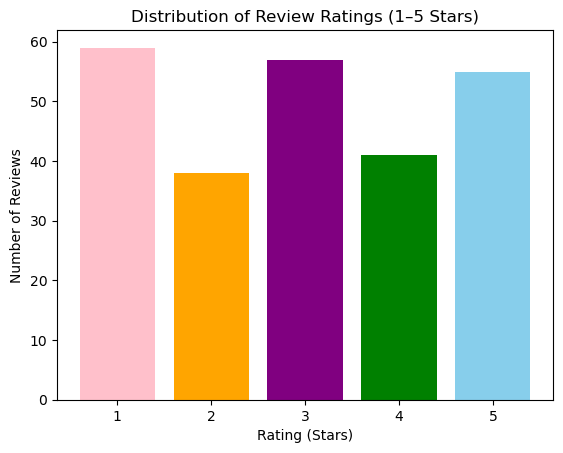

In [25]:
# 1. What is the distribution of review ratings?

rating_counts = df['rating'].value_counts().sort_index()

plt.figure()
colors = ['pink', 'orange', 'purple', 'green', 'skyblue']  # one color per star
plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.xlabel("Rating (Stars)")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Ratings (1–5 Stars)")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

In [26]:
# 2. How many reviews were marked as helpful (above a certain threshold)?

import matplotlib.pyplot as plt

# Example threshold
threshold = 10

# Assuming your dataframe has a column 'helpful_votes'
helpful_counts = pd.Series([
    'Helpful (10+)' if x > threshold else 'Not Helpful' 
    for x in df['helpful_votes']
])
summary = helpful_counts.value_counts()
summary.index = ['Helpful (>10)','Not Helpful (≤10)']

print(summary)

Helpful (>10)        232
Not Helpful (≤10)     18
Name: count, dtype: int64


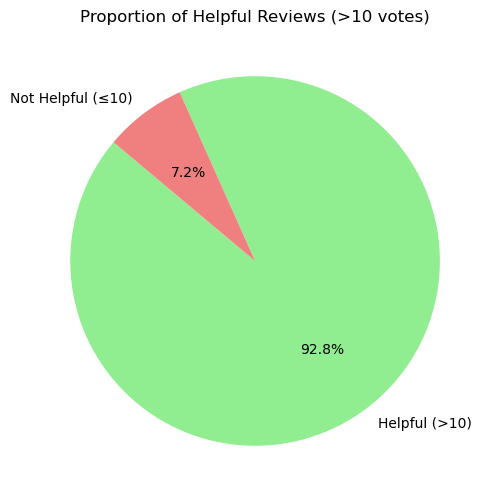

In [27]:
# Plot

plt.figure(figsize=(6,6))
colors = ['lightgreen', 'lightcoral']
plt.pie(summary, labels=summary.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Proportion of Helpful Reviews (>10 votes)")
plt.show()

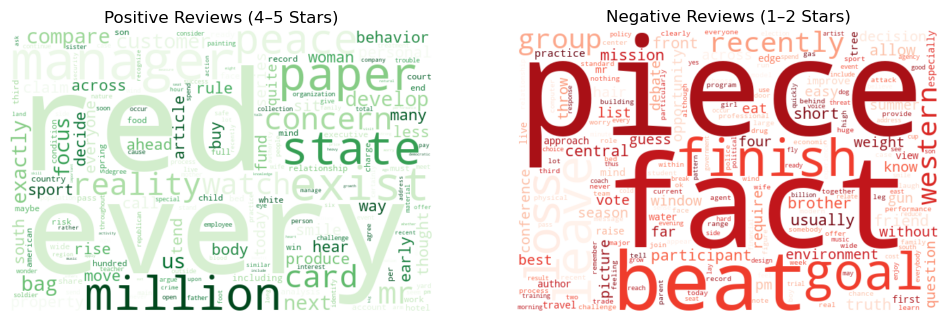

In [28]:
# 3. What are the most common keywords in positive vs. negative reviews?

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter reviews by rating
positive_reviews = df[df['rating'] >= 4]['review'].dropna().str.cat(sep=' ') # Positive reviews: 4–5 stars
negative_reviews = df[df['rating'] <= 2]['review'].dropna().str.cat(sep=' ') # Negative reviews: 1–2 stars

# Generate Word Clouds
positive_wc = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(positive_reviews)
negative_wc = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(negative_reviews)

# Plot 
plt.figure(figsize=(12,6))

# Positive reviews
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews (4–5 Stars)')

# Negative reviews
plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews (1–2 Stars)')

plt.show()

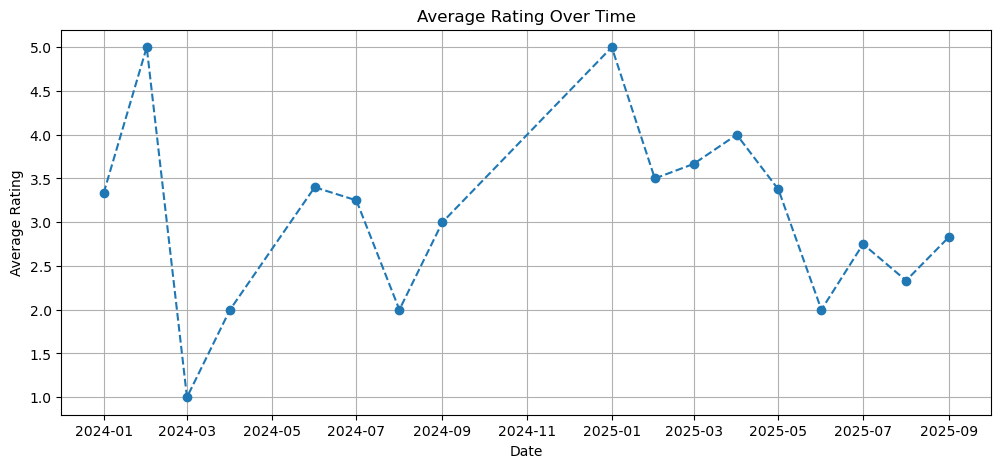

In [29]:
# 4. How has the average rating changed over time?

# Convert date column
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True, errors='coerce')

# Calculate monthly average rating
monthly_avg = df.groupby(df['date'].dt.to_period('M'))['rating'].mean().reset_index()
monthly_avg['date'] = monthly_avg['date'].dt.to_timestamp()

# Line chart
plt.figure(figsize=(12,5))
plt.plot(monthly_avg['date'], monthly_avg['rating'], marker='o', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.title('Average Rating Over Time')
plt.grid(True)
plt.show()


In [30]:
df['location'].value_counts()

location
Congo                                                  6
Christmas Island                                       5
Saudi Arabia                                           5
British Indian Ocean Territory (Chagos Archipelago)    5
Luxembourg                                             5
                                                      ..
Ukraine                                                1
Niger                                                  1
Malawi                                                 1
Tajikistan                                             1
Turkmenistan                                           1
Name: count, Length: 157, dtype: int64

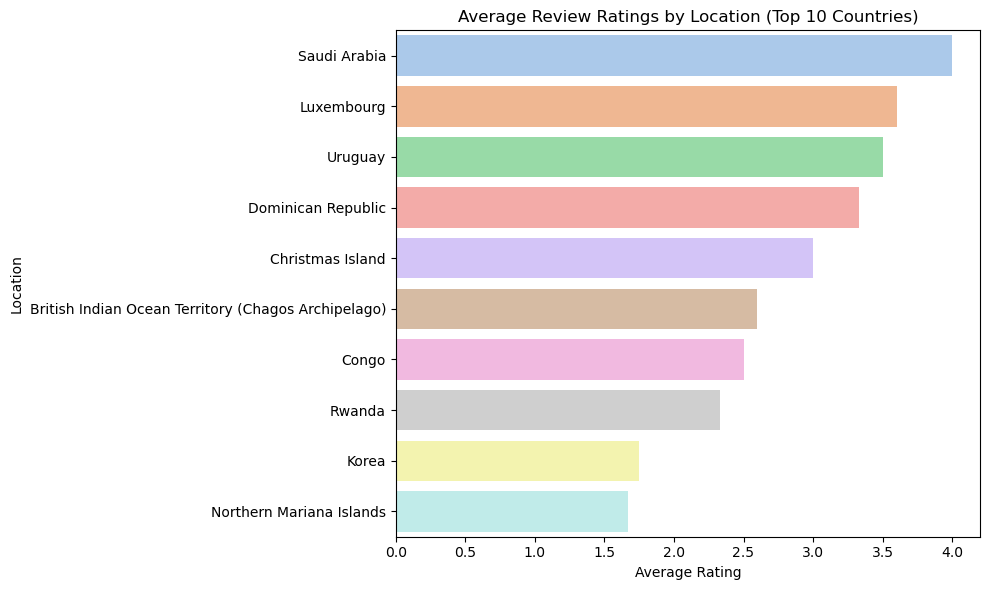

In [31]:
#  5. How do ratings vary by user location?

# Top 10 countries by number of reviews
top_countries = df['location'].value_counts().nlargest(10).index

# Filter dataset for top countries
filtered_df = df[df['location'].isin(top_countries)]

# Calculate average rating by location
avg_rating_by_location = (
    filtered_df.groupby('location')['rating'].mean().sort_values(ascending=False))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette='pastel')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.title('Average Review Ratings by Location (Top 10 Countries)')
plt.tight_layout()
plt.show()

In [32]:
df['platform'].value_counts()

platform
Amazon         56
App Store      55
Website        54
Flipkart       44
Google Play    41
Name: count, dtype: int64

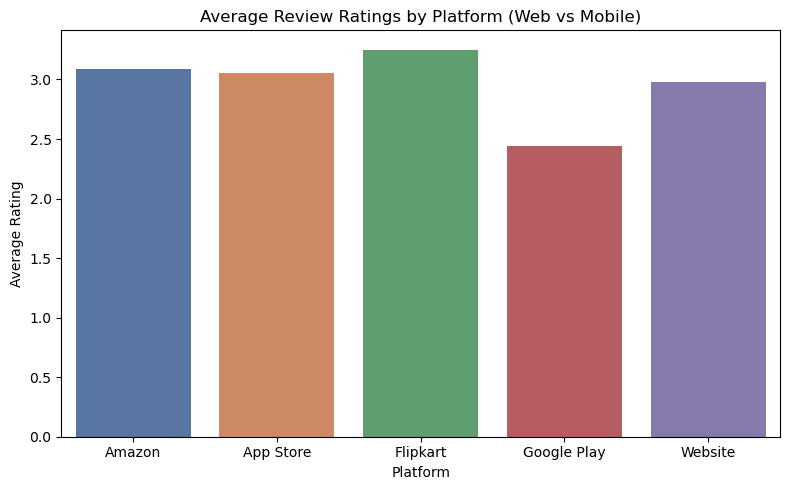

In [33]:
# 6. Which platform (Web vs Mobile) gets better reviews?

# Group by platform and calculate average ratings
avg_rating_by_platform = df.groupby('platform')['rating'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_rating_by_platform, x='platform', y='rating', palette='deep')
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.title('Average Review Ratings by Platform (Web vs Mobile)')
plt.tight_layout()
plt.show()

In [34]:
df['verified_purchase'].value_counts()

verified_purchase
No     134
Yes    116
Name: count, dtype: int64

  verified_purchase    rating
0                No  2.955224
1               Yes  3.008621


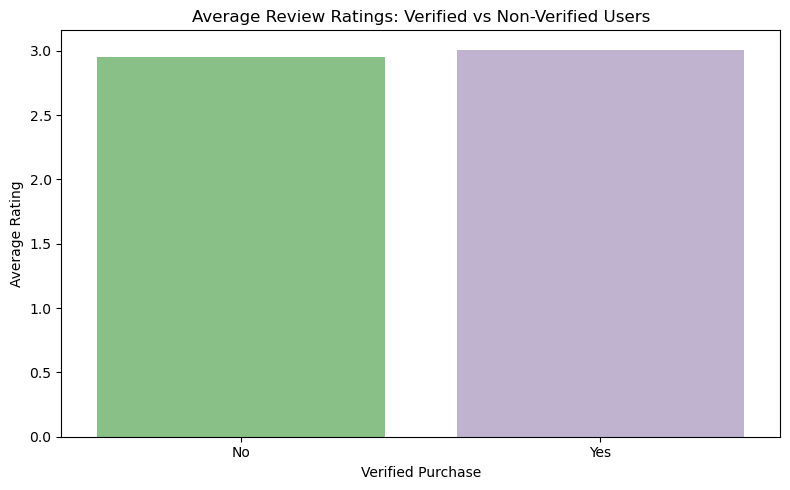

In [35]:
# 7. Are verified users more satisfied than non-verified ones?

# Calculate average rating by verification status
avg_rating_by_verification = (df.groupby('verified_purchase')['rating'].mean().reset_index())
print(avg_rating_by_verification)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data= avg_rating_by_verification, x='verified_purchase', y='rating', palette='Accent')
plt.xlabel('Verified Purchase')
plt.ylabel('Average Rating')
plt.title('Average Review Ratings: Verified vs Non-Verified Users')
plt.tight_layout()
plt.show()

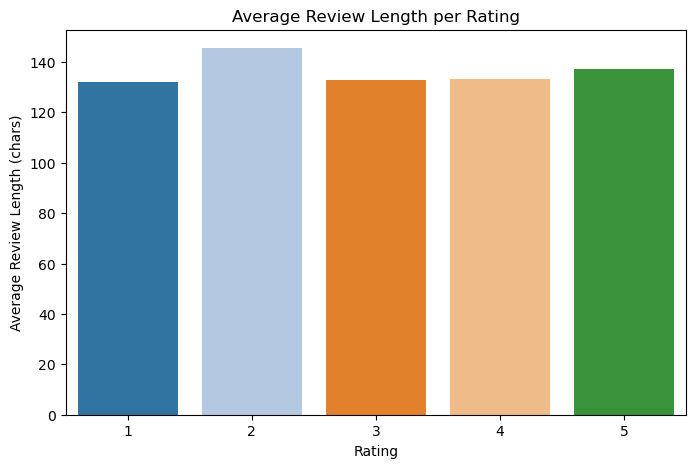

In [36]:
# 8. What’s the average length of reviews per rating category?

# Creating a new column for review length
df['review_length'] = df['review'].apply(len)  

# Calculating average review length per rating
avg_length_per_rating = df.groupby('rating')['review_length'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=avg_length_per_rating, x='rating', y='review_length', palette='tab20')
plt.xlabel('Rating')
plt.ylabel('Average Review Length (chars)')
plt.title('Average Review Length per Rating')
plt.show()

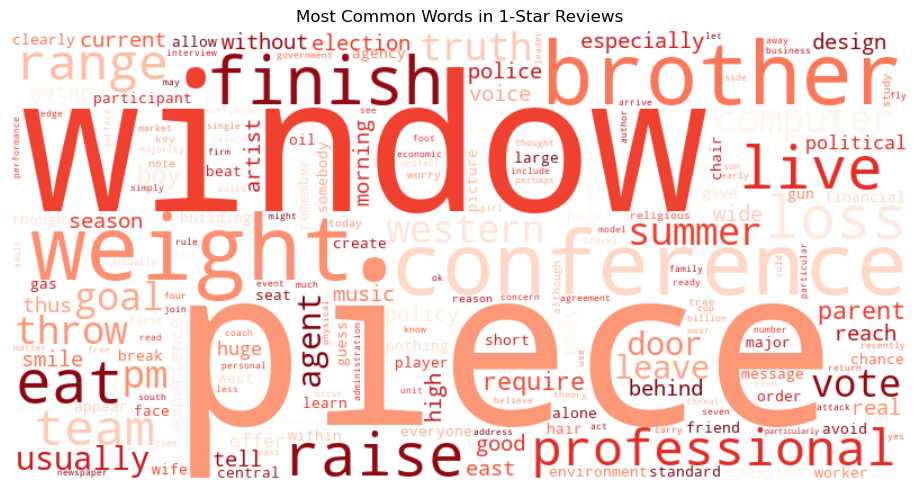

In [37]:
# 9. What are the most mentioned words in 1-star reviews?

# 1-star reviews
one_star_text = ' '.join(df[df['rating'] == 1]['review'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(one_star_text)

# Plot
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in 1-Star Reviews')
plt.tight_layout()
plt.show()

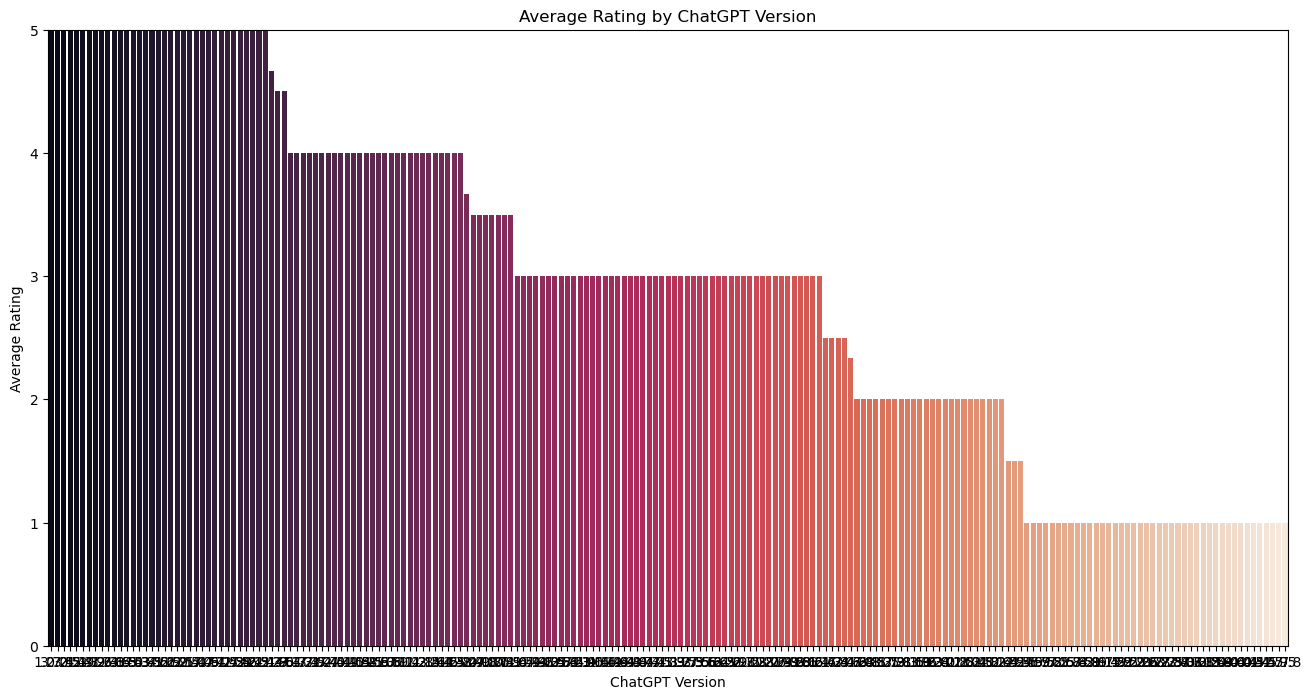

In [38]:
#  10. What ChatGPT version received the highest average rating?

# Average rating per version
avg_rating_by_version = df.groupby('version')['rating'].mean().reset_index()

# Sort by average rating 
avg_rating_by_version = avg_rating_by_version.sort_values('rating', ascending=False)

# Plot 
plt.figure(figsize=(16,8))
sns.barplot(data=avg_rating_by_version, x='version', y='rating', palette='rocket')
plt.xlabel('ChatGPT Version')
plt.ylabel('Average Rating')
plt.title('Average Rating by ChatGPT Version')
plt.ylim(0, 5)  # assuming ratings are out of 5
plt.show()

## Sentiment

In [24]:
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(label_sentiment)

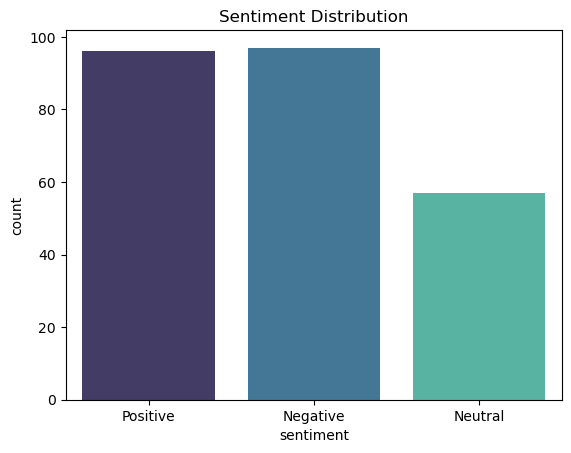

In [27]:
#Sentiment Distribution 

import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df['sentiment'].value_counts()

sns.countplot(data=df, x='sentiment', palette='mako')
plt.title('Sentiment Distribution')
plt.show()

In [28]:
sentiment_map = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

df['sentiment_encoded'] = df['sentiment'].map(sentiment_map)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               250 non-null    object
 1   title              250 non-null    object
 2   review             250 non-null    object
 3   rating             250 non-null    int64 
 4   username           250 non-null    object
 5   helpful_votes      250 non-null    int64 
 6   review_length      250 non-null    int64 
 7   platform           250 non-null    object
 8   language           250 non-null    object
 9   location           250 non-null    object
 10  version            250 non-null    object
 11  verified_purchase  250 non-null    object
 12  no_stopwords       250 non-null    object
 13  tokens             250 non-null    object
 14  lemmatized_tokens  250 non-null    object
 15  processed_text     250 non-null    object
 16  sentiment          250 non-null    object
 1

In [30]:
# Combine title + review

X = df['title'] + " " + df['review']
y = df['sentiment_encoded']


In [31]:
X

0      Claim who accept. every quite sense including ...
1      Growth pretty wish. ask develop bag also his w...
2      What then spend offer reason whom none. if cus...
3      Say dog drug enter director strong student. to...
4      Purpose here beyond. pass share must amount lo...
                             ...                        
245    Father who tax. government card history sudden...
246    Remain movement bit step direction give reduce...
247    Form now then watch certain. just opportunity ...
248    Recent catch gas benefit great religious. onto...
249    Wish best raise choice hear. goal positive ban...
Length: 250, dtype: object

In [32]:
y

0      2
1      2
2      2
3      0
4      2
      ..
245    2
246    2
247    0
248    2
249    2
Name: sentiment_encoded, Length: 250, dtype: int64

### Train test split

In [33]:
#Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Term Frequency–Inverse Document Frequency(TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))

# Fit TF-IDF on X_train

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [35]:
X_train_dense = X_train_tfidf.toarray() # convert sparse to dense

In [36]:
# SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_dense, y_train)


### Model Training

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [38]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "Naive Bayes": MultinomialNB()
}


Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.52      0.60      0.56        20
     neutral       0.50      0.17      0.25        12
    positive       0.43      0.56      0.49        18

    accuracy                           0.48        50
   macro avg       0.49      0.44      0.43        50
weighted avg       0.49      0.48      0.46        50



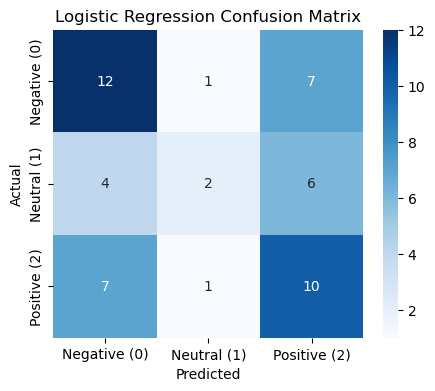


Model: Random Forest
              precision    recall  f1-score   support

    negative       0.41      0.45      0.43        20
     neutral       0.50      0.17      0.25        12
    positive       0.29      0.39      0.33        18

    accuracy                           0.36        50
   macro avg       0.40      0.34      0.34        50
weighted avg       0.39      0.36      0.35        50



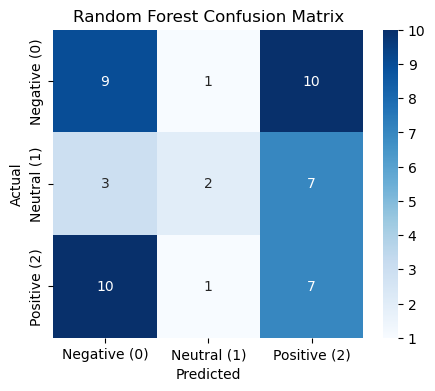


Model: Naive Bayes
              precision    recall  f1-score   support

    negative       0.47      0.40      0.43        20
     neutral       0.31      0.33      0.32        12
    positive       0.45      0.50      0.47        18

    accuracy                           0.42        50
   macro avg       0.41      0.41      0.41        50
weighted avg       0.42      0.42      0.42        50



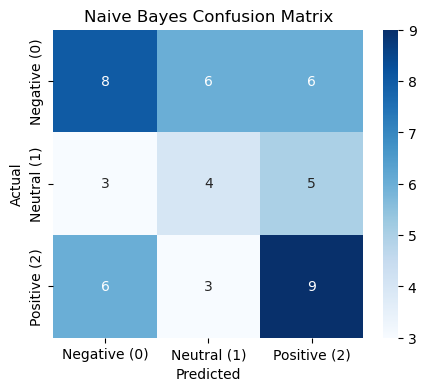

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
threshold = 0.35

# Dictionary to store classification reports
reports = {}

for name, model in models.items():
    print(f"\nModel: {name}")

    model.fit(X_train_smote, y_train_smote)

    # Get probabilities
    y_probs = model.predict_proba(X_test_tfidf)

    # Default prediction (argmax)
    y_pred = np.argmax(y_probs, axis=1)

    # Threshold tuning for class 1 (Neutral)
    y_pred[y_probs[:, 1] >= threshold] = 1

    print(classification_report(y_test, y_pred, target_names=['negative','neutral','positive']))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])

    # Plot
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Negative (0)", "Neutral (1)", "Positive (2)"],
                yticklabels=["Negative (0)", "Neutral (1)", "Positive (2)"])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

### LSTM Implementation

     TF-IDF-based machine learning models cannot understand word order or context. Since conversational text depends on sentence meaning, an LSTM model was used to better capture sequential and semantic information.

In [40]:
pip install tensorflow -q

Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight


In [42]:
x_text = df['review'].astype(str)
y = df['sentiment_encoded'].values

In [43]:
# Tokenization

vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(x_text)

sequences = tokenizer.texts_to_sequences(x_text)

# Padding

maxlen = 50
x = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [44]:
# Train / Test split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [45]:
# Adjust vocab size

actual_vocab_size = min(vocab_size, len(tokenizer.word_index) + 1)

In [46]:
# Build LSTM model

model = Sequential([
    Embedding(input_dim=actual_vocab_size, output_dim=100, input_length=maxlen),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(1, activation='sigmoid')
])


In [47]:
# Compile

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [48]:
# Handle class imbalance

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

In [49]:
# Callbacks

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)


In [50]:
# Train

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - accuracy: 0.2188 - loss: 0.6025 - val_accuracy: 0.2750 - val_loss: 0.2377
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2125 - loss: 0.4438 - val_accuracy: 0.2750 - val_loss: -0.4241
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2125 - loss: 0.2468 - val_accuracy: 0.2750 - val_loss: -0.7369
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2125 - loss: 0.2480 - val_accuracy: 0.2750 - val_loss: -0.9833
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2125 - loss: 0.1868 - val_accuracy: 0.2750 - val_loss: -1.0529
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2125 - loss: 0.1614 - val_accuracy: 0.2750 - val_loss: -0.9346
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2125 - loss: 0.0834 - val_accuracy: 0.2750 - val_loss: -0.8863


In [51]:
# Evaluate

loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2400 - loss: 0.0294
Test Accuracy: 0.2400


In [52]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)  # for multiclass

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 916ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        19
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        19

    accuracy                           0.38        50
   macro avg       0.13      0.33      0.18        50
weighted avg       0.14      0.38      0.21        50

Confusion Matrix:
[[19  0  0]
 [12  0  0]
 [19  0  0]]


## CROSS- VAL

In [53]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Stratified 5-fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store mean CV scores
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=skf, scoring='f1_macro')  # use f1_macro for multi-class
    cv_scores[name] = np.mean(scores)
    print(f"{name} — CV F1-score: {cv_scores[name]:.4f}")

print("\nAll model CV scores:", cv_scores)


Logistic Regression — CV F1-score: 0.5316
Random Forest — CV F1-score: 0.5416
Naive Bayes — CV F1-score: 0.4157

All model CV scores: {'Logistic Regression': np.float64(0.5316302612749114), 'Random Forest': np.float64(0.541594345707249), 'Naive Bayes': np.float64(0.41568570818570827)}


### Although Random Forest shows slightly higher accuracy, Logistic Regression was chosen because it provides interpretable predictions. 
### It is better suited for TF-IDF features, and allows easier tuning for the Neutral class, which is important for this sentiment analysis task. 

## AUC ND ROC CURVE

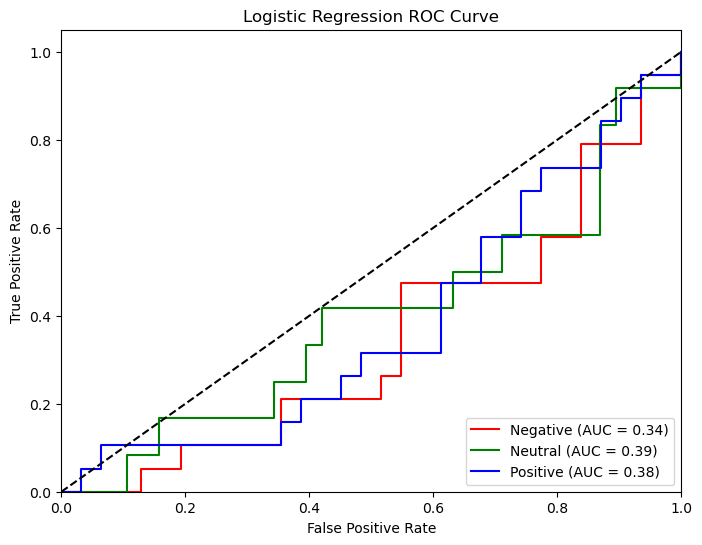

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize y_test for multi-class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # 0=Negative,1=Neutral,2=Positive

# Fit Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_smote, y_train_smote)

# Get predicted probabilities
y_probs = logreg.predict_proba(X_test_tfidf)

# Plot ROC curve for each class
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
classes = ['Negative','Neutral','Positive']

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f"{classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [55]:
import pickle

model = models["Logistic Regression"]

# save model
pickle.dump(model, open("log_reg_senti.pkl", "wb"))

# save tfidf 
pickle.dump(tfidf, open("tfidf_senti.pkl", "wb"))

print(" Logistic Regression Model and TF-IDF saved successfully")

 Logistic Regression Model and TF-IDF saved successfully


In [56]:
# Save cleaned CSV
df.to_csv("cleaned_reviews.csv", index=False)